# Fourier series of simple functions with arbitrary period $T_{0}$

This notebook illustrates the Fourier series expansion for simple functions with arbitrary period $T_{0}$. Some examples can be found at:

https://www.math24.net/fourier-series-definition-typical-examples/

In [1]:
import numpy as np
from scipy.signal import sawtooth, square
import matplotlib.pyplot as plt
import my_functions as mfun

In [2]:
def x2y(x, T0):
    '''
    Transform x into y according to:
    
    y = (T0/(2.*np.pi))*x
    '''
    return (T0/(2.*np.pi))*x

In [3]:
def y2x(y, T0):
    '''
    Transform y into x according to:
    
    x = ((2.*np.pi)/T0)*y
    '''
    return ((2.*np.pi)/T0)*y

### Upward sawtooth function

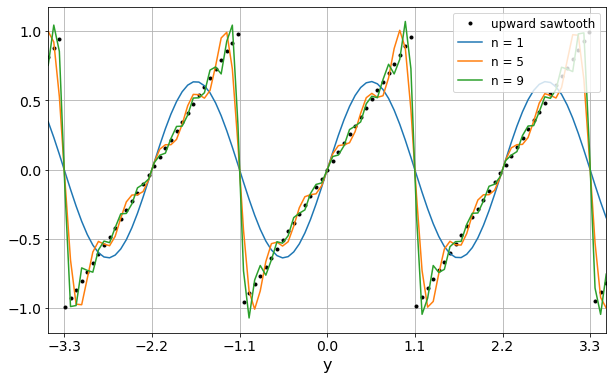

In [5]:
T0 = 2.2
f0 = 1/T0
x = np.linspace(-10, 10, 101)
y = x2y(x, T0)

nmax = 11
bn_up_sawtooth = mfun.upward_sawtooth_bn(nmax)

plt.figure(figsize=(10,6))
plt.plot(y, sawtooth(t=y2x(y-0.5*T0, T0), width=1), 'k.', label='upward sawtooth')
for n in range(1, nmax+1, 4):
    fs = mfun.fourier_series_real(x=y2x(y, T0), a0=0, an=None, bn=bn_up_sawtooth[:n])
    plt.plot(y, fs, '-', label='n = %d' % n)
plt.xticks(ticks=[0.5*T0*i for i in range(-4, 4)])
plt.xlim(np.min(y), np.max(y))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('y', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()

In [6]:
nmax = 20
a0_up_sawtooth = 0
an_up_sawtooth = np.zeros(nmax)
bn_up_sawtooth = mfun.upward_sawtooth_bn(nmax)

x = np.linspace(-10, 10, 201)
y = x2y(x, T0)

fs_real_up_sawtooh = mfun.fourier_series_real(x=y2x(y, T0), a0=a0_up_sawtooth, 
                                              an=an_up_sawtooth, bn=bn_up_sawtooth)

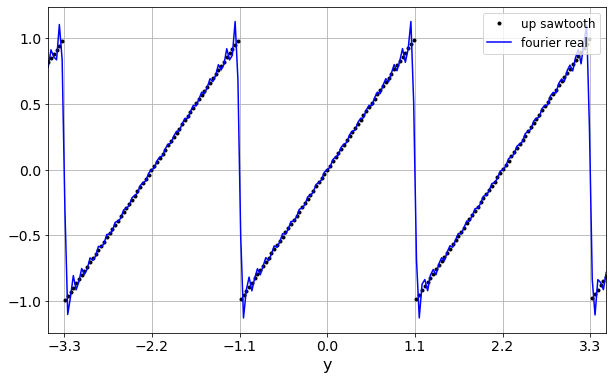

In [7]:
plt.figure(figsize=(10,6))
plt.plot(y, sawtooth(t=y2x(y-0.5*T0, T0), width=1), 'k.', label='up sawtooth')

plt.plot(y, fs_real_up_sawtooh, 'b-', label='fourier real')

plt.xticks(ticks=[0.5*T0*i for i in range(-4, 4)])
plt.xlim(np.min(y), np.max(y))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('y', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()

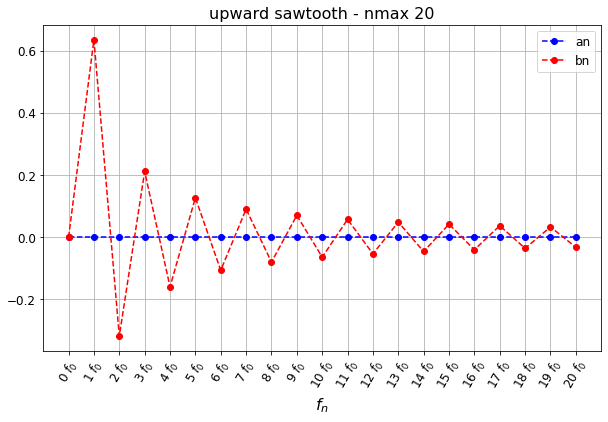

In [8]:
plt.figure(figsize=(10,6))
plt.title('upward sawtooth - nmax %d' % nmax, fontsize=16)
plt.plot(np.hstack([a0_up_sawtooth, an_up_sawtooth]), 'bo--', label='an')
plt.plot(np.hstack([             0, bn_up_sawtooth]), 'ro--', label='bn')
plt.xticks(ticks=[i for i in range(bn_up_sawtooth.size+1)],
           labels=[('%d $f_{0}$' % i) for i in range(bn_up_sawtooth.size+1)],
           rotation=60)
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('$f_{n}$', fontsize=16)
plt.show()

In [9]:
c0_up_sawtooth, cn_up_sawtooth = mfun.complex_coefficients(a0_up_sawtooth, 
                                                           an_up_sawtooth, 
                                                           bn_up_sawtooth)

In [10]:
fs_complex_up_sawtooth = mfun.fourier_series_complex(x=y2x(y, T0), c0=c0_up_sawtooth, 
                                                     cn=cn_up_sawtooth)

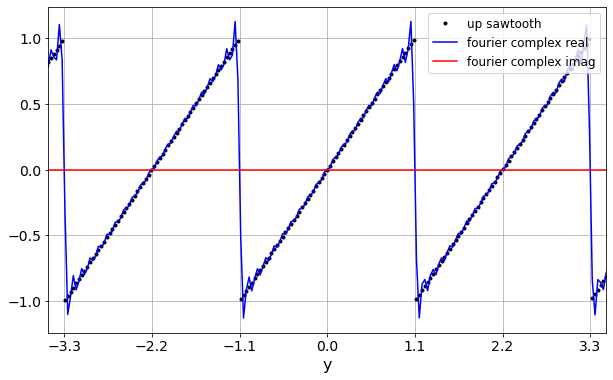

In [11]:
plt.figure(figsize=(10,6))
plt.plot(y, sawtooth(t=y2x(y-0.5*T0, T0), width=1), 'k.', label='up sawtooth')

plt.plot(y, fs_complex_up_sawtooth.real, 'b-', label='fourier complex real')
plt.plot(y, fs_complex_up_sawtooth.imag, 'r-', label='fourier complex imag')

plt.xticks(ticks=[0.5*T0*i for i in range(-4, 4)])
plt.xlim(np.min(y), np.max(y))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('y', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()

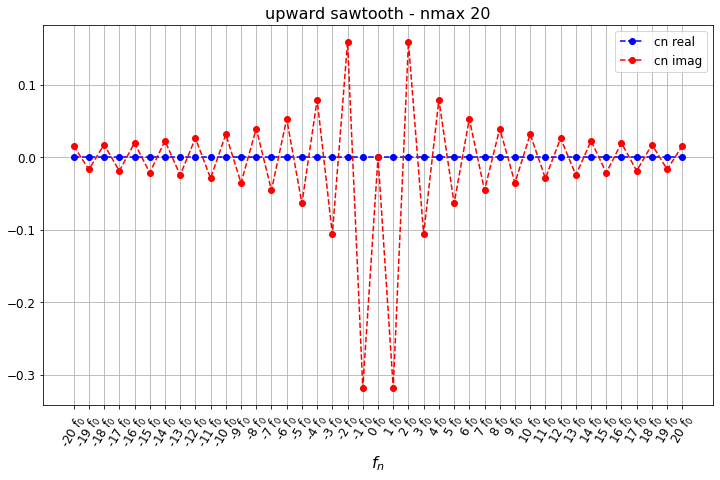

In [12]:
plt.figure(figsize=(12,7))
plt.title('upward sawtooth - nmax %d' % nmax, fontsize=16)
plt.plot(np.hstack([cn_up_sawtooth[::-1].real,
                    c0_up_sawtooth, 
                    cn_up_sawtooth.real]), 'bo--', label='cn real')
plt.plot(np.hstack([cn_up_sawtooth[::-1].imag,
                    0, 
                    cn_up_sawtooth.imag]), 'ro--', label='cn imag')
plt.xticks(ticks=[i for i in range(2*cn_up_sawtooth.size+1)],
           labels=[('%d $f_{0}$' % i) for i in range(-cn_up_sawtooth.size, cn_up_sawtooth.size+1)],
           rotation=60)

plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$f_{n}$', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()

### Odd square function

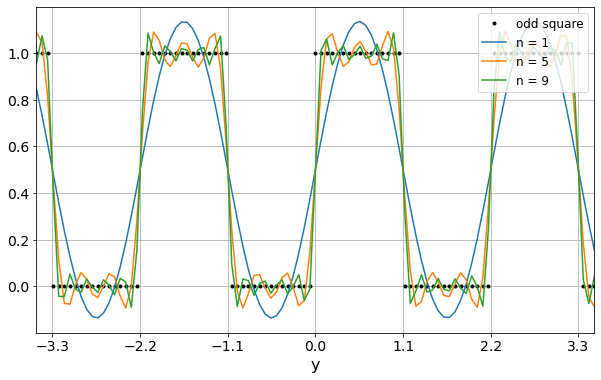

In [13]:
T0 = 2.2
f0 = 1/T0
x = np.linspace(-10, 10, 101)
y = x2y(x, T0)

nmax = 11
bn_odd_square = mfun.odd_square_bn(nmax)

plt.figure(figsize=(10,6))
plt.plot(y, 0.5*(square(t=y2x(y, T0), duty=0.5) + 1), 'k.', label='odd square')
for n in range(1, nmax+1, 4):
    fs = mfun.fourier_series_real(x=y2x(y, T0), a0=1, an=None, bn=bn_odd_square[:n])
    plt.plot(y, fs, '-', label='n = %d' % n)
plt.xticks(ticks=[0.5*T0*i for i in range(-4, 4)])
plt.xlim(np.min(y), np.max(y))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('y', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()

In [14]:
nmax = 20
a0_odd_square = 1
an_odd_square = np.zeros(nmax)
bn_odd_square = mfun.odd_square_bn(nmax)

x = np.linspace(-10, 10, 201)
y = x2y(x, T0)

fs_real_odd_square = mfun.fourier_series_real(x=y2x(y, T0), a0=a0_odd_square, 
                                              an=an_odd_square, bn=bn_odd_square)

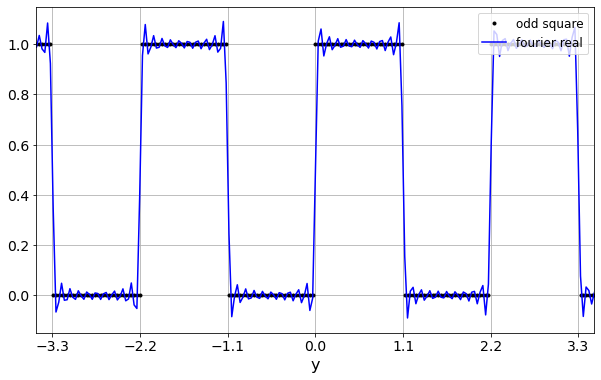

In [15]:
plt.figure(figsize=(10,6))
plt.plot(y, 0.5*(square(t=y2x(y, T0), duty=0.5) + 1), 'k.', label='odd square')

plt.plot(y, fs_real_odd_square, 'b-', label='fourier real')

plt.xticks(ticks=[0.5*T0*i for i in range(-4, 4)])
plt.xlim(np.min(y), np.max(y))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('y', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()

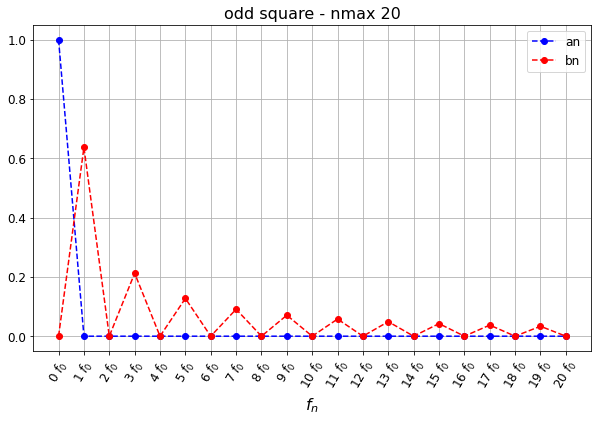

In [16]:
plt.figure(figsize=(10,6))
plt.title('odd square - nmax %d' % nmax, fontsize=16)
plt.plot(np.hstack([a0_odd_square, an_odd_square]), 'bo--', label='an')
plt.plot(np.hstack([             0, bn_odd_square]), 'ro--', label='bn')
plt.xticks(ticks=[i for i in range(bn_odd_square.size+1)],
           labels=[('%d $f_{0}$' % i) for i in range(bn_odd_square.size+1)],
           rotation=60)
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('$f_{n}$', fontsize=16)
plt.show()

In [17]:
c0_odd_square, cn_odd_square = mfun.complex_coefficients(a0_odd_square, 
                                                         an_odd_square, 
                                                         bn_odd_square)

In [18]:
fs_complex_odd_square = mfun.fourier_series_complex(x=y2x(y, T0), c0=c0_odd_square, 
                                                    cn=cn_odd_square)

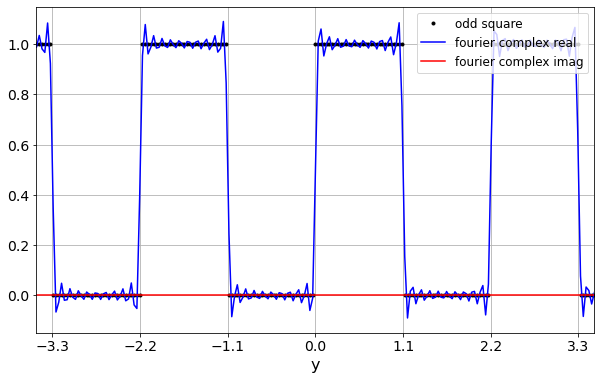

In [19]:
plt.figure(figsize=(10,6))
plt.plot(y, 0.5*(square(t=y2x(y, T0), duty=0.5) + 1), 'k.', label='odd square')

plt.plot(y, fs_complex_odd_square.real, 'b-', label='fourier complex real')
plt.plot(y, fs_complex_odd_square.imag, 'r-', label='fourier complex imag')

plt.xticks(ticks=[0.5*T0*i for i in range(-4, 4)])
plt.xlim(np.min(y), np.max(y))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('y', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()

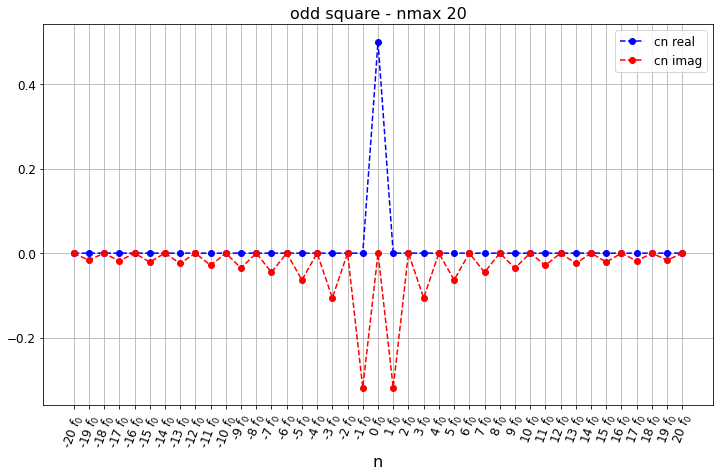

In [20]:
plt.figure(figsize=(12,7))
plt.title('odd square - nmax %d' % nmax, fontsize=16)
plt.plot(np.hstack([cn_odd_square[::-1].real,
                    c0_odd_square, 
                    cn_odd_square.real]), 'bo--', label='cn real')
plt.plot(np.hstack([cn_odd_square[::-1].imag,
                    0, 
                    cn_odd_square.imag]), 'ro--', label='cn imag')
plt.xticks(ticks=[i for i in range(2*cn_odd_square.size+1)],
           labels=[('%d $f_{0}$' % i) for i in range(-cn_odd_square.size, cn_odd_square.size+1)],
           rotation=70)
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('n', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()

### Even triangle function

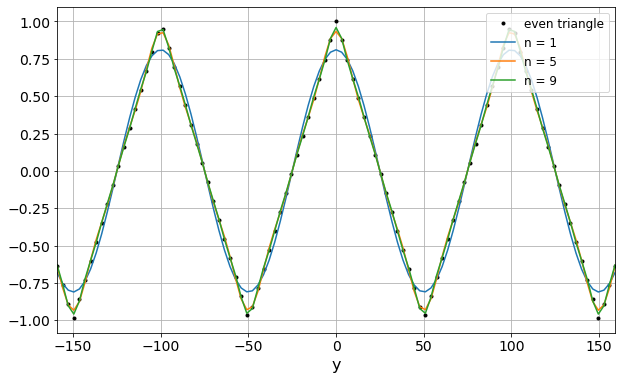

In [29]:
T0 = 100
f0 = 1/T0
x = np.linspace(-10, 10, 101)
y = x2y(x, T0)

nmax = 11
an_even_triangle = mfun.even_triangle_an(nmax)

plt.figure(figsize=(10,6))
plt.plot(y, sawtooth(t=y2x(y-0.5*T0, T0), width=0.5), 'k.', label='even triangle')
for n in range(1, nmax+1, 4):
    fs = mfun.fourier_series_real(x=y2x(y, T0), a0=0, an=an_even_triangle[:n], bn=None)
    plt.plot(y, fs, '-', label='n = %d' % n)
plt.xticks(ticks=[0.5*T0*i for i in range(-4, 4)])
plt.xlim(np.min(y), np.max(y))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('y', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()

In [30]:
nmax = 20
a0_even_triangle = 0
an_even_triangle = mfun.even_triangle_an(nmax)
bn_even_triangle = np.zeros(nmax)

x = np.linspace(-10, 10, 201)
y = x2y(x, T0)

fs_real_even_triangle = mfun.fourier_series_real(x=y2x(y, T0), a0=a0_even_triangle, 
                                                 an=an_even_triangle, bn=bn_even_triangle)

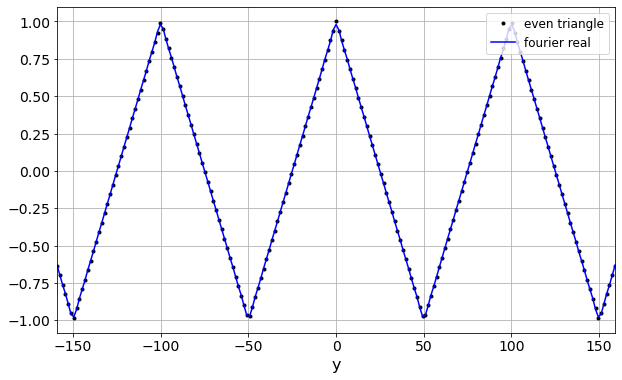

In [31]:
plt.figure(figsize=(10,6))
plt.plot(y, sawtooth(t=y2x(y-0.5*T0, T0), width=0.5), 'k.', label='even triangle')

plt.plot(y, fs_real_even_triangle, 'b-', label='fourier real')

plt.xticks(ticks=[0.5*T0*i for i in range(-4, 4)])
plt.xlim(np.min(y), np.max(y))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('y', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()

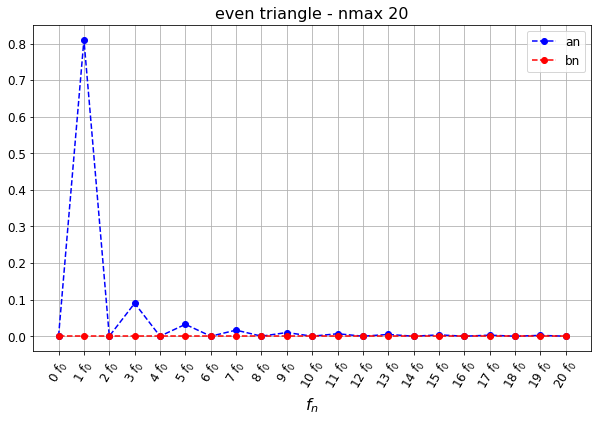

In [32]:
plt.figure(figsize=(10,6))
plt.title('even triangle - nmax %d' % nmax, fontsize=16)
plt.plot(np.hstack([a0_even_triangle, an_even_triangle]), 'bo--', label='an')
plt.plot(np.hstack([               0, bn_even_triangle]), 'ro--', label='bn')
plt.xticks(ticks=[i for i in range(bn_even_triangle.size+1)],
           labels=[('%d $f_{0}$' % i) for i in range(bn_even_triangle.size+1)],
           rotation=60)
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('$f_{n}$', fontsize=16)
plt.show()

In [33]:
c0_even_triangle, cn_even_triangle = mfun.complex_coefficients(a0_even_triangle, 
                                                               an_even_triangle, 
                                                               bn_even_triangle)

In [34]:
fs_complex_even_triangle = mfun.fourier_series_complex(x=y2x(y, T0), c0=c0_even_triangle, 
                                                       cn=cn_even_triangle)

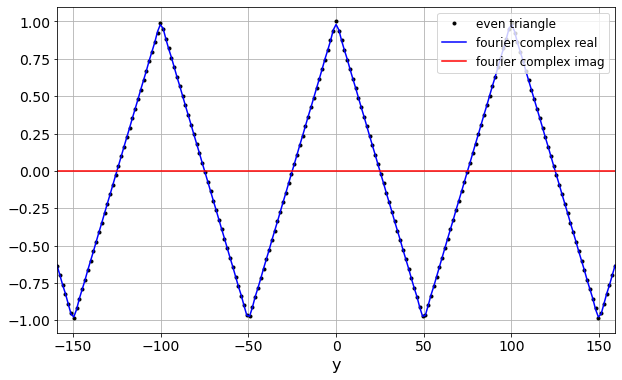

In [35]:
plt.figure(figsize=(10,6))
plt.plot(y, sawtooth(t=y2x(y-0.5*T0, T0), width=0.5), 'k.', label='even triangle')

plt.plot(y, fs_complex_even_triangle.real, 'b-', label='fourier complex real')
plt.plot(y, fs_complex_even_triangle.imag, 'r-', label='fourier complex imag')

plt.xticks(ticks=[0.5*T0*i for i in range(-4, 4)])
plt.xlim(np.min(y), np.max(y))
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('y', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()

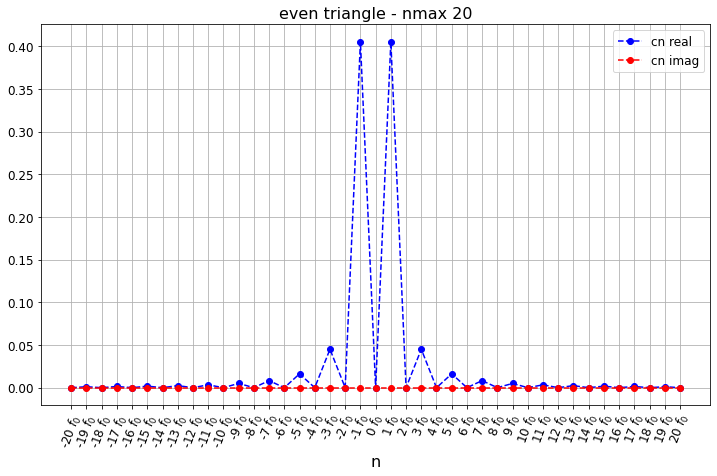

In [36]:
plt.figure(figsize=(12,7))
plt.title('even triangle - nmax %d' % nmax, fontsize=16)
plt.plot(np.hstack([cn_even_triangle[::-1].real,
                    c0_even_triangle, 
                    cn_even_triangle.real]), 'bo--', label='cn real')
plt.plot(np.hstack([cn_even_triangle[::-1].imag,
                    0, 
                    cn_even_triangle.imag]), 'ro--', label='cn imag')
plt.xticks(ticks=[i for i in range(2*cn_even_triangle.size+1)],
           labels=[('%d $f_{0}$' % i) for i in range(-cn_even_triangle.size, cn_even_triangle.size+1)],
           rotation=70)
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('n', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()